<a href="https://colab.research.google.com/github/kla55/Pytorch_learning/blob/main/projects/simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.autograd import Variable
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torchvision import datasets
from torch.utils.data import DataLoader
from torch import optim

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [122]:
import torchvision.transforms as transforms

from torchvision.transforms import ToTensor, Resize, Compose


transformations = Compose([
    Resize((28, 28)),  # Resize each image to 256x256
    ToTensor()           # Then convert them to Tensor
])

In [123]:
train_data = datasets.Food101(
    root="data",
    split='train',
    download=True,
    transform=transformations
)

test_data = datasets.Food101(
    root="data",
    split='test',
    download=True,
    transform=transformations
)

In [141]:
num_classes = len(train_data.classes)
num_classes

101

In [124]:
# train_data = datasets.MNIST(root=".",
#                             train=True,
#                             download=True,
#                             transform=ToTensor())

# test_data = datasets.MNIST(root=".",
#                            train=False,
#                            download=True,
#                            transform=ToTensor())


47114
28938
3394
40694
33723


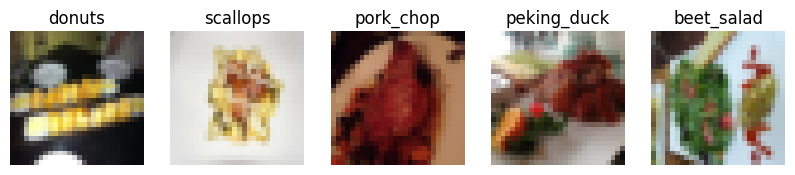

In [125]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
rows, cols = 1, 5
for i in range(1, 6):
  random_inx = torch.randint(0,len(train_data), size =[1]).item()
  print(random_inx)
  image, label = train_data[random_inx]
  image = np.transpose(image, (1, 2, 0))
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = 'gray')
  plt.title(train_data.classes[label])
  plt.axis(False)


In [126]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f8d67c4add0>, <torch.utils.data.dataloader.DataLoader object at 0x7f8d67c4a050>)
Length of train dataloader: 2368 batches of 32
Length of test dataloader: 790 batches of 32


In [127]:
train_features, train_labels = next(iter(train_data))

In [128]:
train_features.shape

torch.Size([3, 28, 28])

In [129]:
from torch import nn

class model_v0(torch.nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
                    nn.Conv2d(in_channels=input_shape,
                              out_channels=hidden_units,
                              kernel_size=3,
                              stride=1,
                              padding=1),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=hidden_units,
                        out_channels=hidden_units,
                        kernel_size=3,
                        stride=1,
                        padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2))

    self.conv_block_2 = nn.Sequential(
                      nn.Conv2d(in_channels=hidden_units,
                                out_channels=hidden_units,
                                kernel_size=3,
                                stride=1,
                                padding=1),
                      nn.ReLU(),
                      nn.Conv2d(in_channels=hidden_units,
                                out_channels=hidden_units,
                                kernel_size=3,
                                stride=1,
                                padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2))

    self.classifier = nn.Sequential(
                    nn.Flatten(),
                    nn.Linear(in_features=hidden_units*7*7,
                              out_features=output_shape))

  def forward(self, x):
                    x = self.conv_block_1(x)
                    # print(f"Output shape of conv block 1: {x.shape}")
                    x = self.conv_block_2(x)
                    # print(f"Output shape of conv block 2: {x.shape}")
                    x = self.classifier(x)
                    # print(f"Output shape of classifier: {x.shape}")
                    return x

In [142]:
model_V0 = model_v0(input_shape=3,
                  hidden_units=10,
                  output_shape=101).to(device)
model_V0



model_v0(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=101, bias=True)
  )
)

In [143]:
dummy_x = torch.rand(size = (3, 28, 28)).unsqueeze( dim = 0).to(device)
model_V0(dummy_x)


tensor([[-0.0336,  0.0164, -0.0181, -0.0617,  0.0687,  0.0105,  0.0324,  0.0580,
          0.0066, -0.0563,  0.0379, -0.0231, -0.0458,  0.0662,  0.0125, -0.0822,
          0.0087, -0.0442,  0.0162,  0.0255,  0.0202, -0.0606, -0.0299, -0.0451,
         -0.0041, -0.0691, -0.0465,  0.0410,  0.0199,  0.0440, -0.0709,  0.0292,
         -0.0224, -0.0032, -0.0256, -0.0300,  0.0295, -0.0241, -0.0469,  0.0209,
         -0.0064, -0.0736, -0.0493,  0.0089,  0.0095,  0.0253,  0.0032,  0.0161,
         -0.0842,  0.0709, -0.0270, -0.0205,  0.0093,  0.0002,  0.0280, -0.0096,
          0.0103,  0.0195,  0.0056,  0.0537, -0.0329, -0.0538, -0.0570, -0.0079,
         -0.0204, -0.0898, -0.0692,  0.0201, -0.0496, -0.0071, -0.0105, -0.0053,
          0.0126,  0.0218,  0.0432,  0.0490,  0.0195,  0.0065, -0.0010,  0.0224,
          0.0377,  0.0311, -0.0690, -0.0362,  0.0295,  0.1045, -0.0244,  0.0146,
          0.0727,  0.0277,  0.0581,  0.0159,  0.1073, -0.0132,  0.0081, -0.0585,
         -0.0340,  0.0437,  

In [148]:
from tqdm.auto import tqdm

model_cpu = model_v0(input_shape=3,
                    hidden_units=10,
                    output_shape=101)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

In [149]:
y

tensor([18, 62, 49, 17, 20, 79, 89,  9,  2, 83, 10, 82, 78, 21, 17, 23, 26, 72,
        27, 70, 63, 38, 85,  3, 57, 53, 66, 96, 21, 30, 44, 49])

In [150]:
y_pred.shape

torch.Size([32, 10])

In [151]:
EPOCHS = 5

for epoch in tqdm(range(EPOCHS)):
  train_loss = 0
  model_cpu.train()
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to('cpu'), y.to('cpu')
    y_pred = model_cpu(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)

  test_loss_total = 0
  model_cpu.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)
      test_loss_total += test_loss
    test_loss_total /= len(test_dataloader)

  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 4.565 | Test loss: 4.504
Epoch: 1 | Loss: 4.391 | Test loss: 4.409


KeyboardInterrupt: ignored

In [136]:
train_dataloader

In [ ]:
image.shape

In [ ]:
training_dataz

In [ ]:
projects/simple_nn.ipynb